Credits: Edie Miglio

# Introduction to Python

Python is an interpreted language. For the pourposes of this course I suggest you to use either [Colab](https://colab.research.google.com/) or install [Anaconda](https://www.anaconda.com/).

The approach we will adopt is based on the resolution of small problems and projects. In each project we will introduce some features of the language. The course will focus on the use of Python for managing data and for implementing mathematical algorithms.



## Project 1: Fahrenheit to Celsius

**Skills**:

*   input from the command line
*   casting (string to float)
*   variable assignements
*   simple math formulas
*   print
*   functions
* importance of the indentation



**Problem**: ask the user a temperature in Fahrenheit and print the corresponding Celsius value using the the formula
$$
^\circ C = \frac{5}{9}(^\circ F - 32).
$$

In [1]:
# Ask the user the Fahrenheit temperarature. Notice that the input given by the
# user is a string
fahrenheit_string = input("Enter the temperature in Fahrenheit:")
# Convert the string to number (casting)
fahrenheit = float(fahrenheit_string)
# Use the conversion formula to find the Celsius temperature
celsius = (fahrenheit - 32) * 5/9
# Print the Celsius value
print(celsius)

Enter the temperature in Fahrenheit:2
-16.666666666666668


The problem with the implementation we have just seen is that if we want to perform multiple conversion we ha to re-run the cell. In order to have a tool that can be called many times in an easy way we can create a **function**: a function is defined by the keyword <code>def</code>. Let us see how we can change the implementation making use of the function concept.

In [2]:
# NOTE the indentation!
def convert(s):   # Definition of the function with the input parameter(s)
    f = float(s)
    c = (f - 32) * 5/9
    return c      # Return the Celsius temperature

Let us now use the new defined function.

In [3]:
# Ask the user the Fahrenheit temperarature. Notice that the input given
# by the user is a string
fahrenheit_string = input("Enter the temperature in Fahrenheit:")
celsius = convert(fahrenheit_string) # Call the function
print(celsius)

Enter the temperature in Fahrenheit:3
-16.11111111111111


**Exercise 1** Write a Python function for converting from Kelvin to Fahrenheit. The formula is
$$
F = 1.8(K-273.15) + 32.
$$

In [4]:
convert1("555")

NameError: name 'convert1' is not defined

In [5]:
def convert1(s):   # Definition of the function with the input parameter(s)
    k = float(s)
    f = 1.8*(k-273.15)+32
    return f

In [6]:
kelvin_string = input("Enter the temperature in Kelvin:")
farhenheit = convert1(kelvin_string) # Call the function
print("The temperature in F is:",farhenheit)

Enter the temperature in Kelvin:4
The temperature in F is: -452.46999999999997


## Project 2: van der Waals equation

The van der Waals equation of state is a modification of the ideal gas law and i takes into account also the molecular size and the molecular interaction forces. This equation can be written as
$$
\left[P+a\left(\frac{n}{V}\right)^2\right]\left(V-nb\right)=nRT,
$$
where $P\,[Pa]$ is the pressure, $V \, [m^3]$ is the volume, $T [K]$ is the temperature, $n$ is the number of moles, $R=8,314 \, [J / (mol ∙ K)] $ is the gas constant, finally $a [Pa \, m^6/mol^2]$ and $b [m^3/mol]$ are the van der Waals coefficients characterizing different gases. In the following table values of $a$ and $b$ are reported for some gases.



Gas            |     a   | b
---------------|---------|---------
Helium         | 3.46e-3 | 23.71e-6
Neon           | 2.12e-2 | 17.10e-6
Hydrogen       | 2.45e-2 | 26.61e-6
Carbon dioxide | 3.96e-1 | 42.69e-6
Water vapor    | 5.47e-1 | 30.52e-6
Oxygen         | 1.38e-1 | 31.86e-6

**Skills**.

*   Function with many input parameters
* Help
* Simple formatting
*   Optional input arguments and default values
* Positional and keyword arguments

**Problem**: write a Python function that computes the pressure given the temperature and the volume for a real gas. The input parameters of the function should be $T, V, n, a$ and $b$; the output is the pressure $P$.

In [7]:
def vanderwaals(T, V, n, a, b):
    R = 8.314
    P = n*R*T/(V-n*b)-a*n**2/V**2
    return P

Let us compute the pressure exerted by $1 \, mol$ of $O_2$ confined in a volume of $0.001 \, m^3$ at $T=273.15 \, K$.

In [8]:
P = vanderwaals(273.15,0.001,1,1.38e-1,31.86e-6)
print(P)

2207703.204082054


If you want to visualize the result in scientific notation you can use <code>format</code>. Let us see the help.

In [9]:
help(format)

Help on built-in function format in module builtins:

format(value, format_spec='', /)
    Return value.__format__(format_spec)
    
    format_spec defaults to the empty string.
    See the Format Specification Mini-Language section of help('FORMATTING') for
    details.



In [10]:
help('FORMATTING')

Format String Syntax
********************

The "str.format()" method and the "Formatter" class share the same
syntax for format strings (although in the case of "Formatter",
subclasses can define their own format string syntax).  The syntax is
related to that of formatted string literals, but it is less
sophisticated and, in particular, does not support arbitrary
expressions.

Format strings contain “replacement fields” surrounded by curly braces
"{}". Anything that is not contained in braces is considered literal
text, which is copied unchanged to the output.  If you need to include
a brace character in the literal text, it can be escaped by doubling:
"{{" and "}}".

The grammar for a replacement field is as follows:

      replacement_field ::= "{" [field_name] ["!" conversion] [":" format_spec] "}"
      field_name        ::= arg_name ("." attribute_name | "[" element_index "]")*
      arg_name          ::= [identifier | digit+]
      attribute_name    ::= identifier
      element_i

In [11]:
P_sn="{:e}".format(P)
print(P_sn)

2.207703e+06


Let us now suppose we want to modify the previous function in such a way that, by default, $a$ and $b$ are assigned the values relative to the oxygen and the user con override these default values.

In [12]:
def vanderwaals1(T, V, n, a=1.38e-1, b=31.86e-6):
    R = 8.314
    P = n*R*T/(V-n*b)-a*n**2/V**2
    return P

In [13]:
P = vanderwaals1(273.15, 0.001, 1)
print("{:e}".format(P))

2.207703e+06


Now let us suppose we want to compute the pressure exerted by $1 \, mol$  of  Helium confined in a volume of  $0.001\,m^3$  at  $T=273.15 \, K$.

In [14]:
P = vanderwaals1(273.15, 0.001, 1, 3.46e-3, 23.71e-6)
print("{:e}".format(P))

2.322661e+06


It is also possible to specify the names of the default variables

In [15]:
P = vanderwaals1(273.15, 0.001, 1, a=3.46e-3, b=23.71e-6)
print("{:e}".format(P))

2.322661e+06


Or only one of the default parameter can  be specified

In [16]:
P = vanderwaals1(273.15, 0.001, 1, a=3.46e-3)
print("{:e}".format(P))

2.342243e+06


If the name of a default parameter is set then Python will follow the order of the input parameters, if we want to specify just `a`

In [17]:
P = vanderwaals1(273.15, 0.001, 1, 3.46e-3)
print("{:e}".format(P))

2.342243e+06


However, if want to give a vale to the other parameters with a default value we need to explicit use their name. If we want to use the default value of `a` but set the `b` we can do as

In [18]:
P = vanderwaals1(273.15, 0.001, 1, b=3.46e-6)
print("{:e}".format(P))

2.140854e+06


It is also possible to not follow the same order of the input when the names of the input parameters are explicitly used

In [19]:
P = vanderwaals1(273.15, 0.001, 1, b=23.71e-6, a=3.46e-3,)
print("{:e}".format(P))

2.322661e+06


It is not possible to mix parameters called by name with others where the name is not specified

In [20]:
P = vanderwaals1(273.15, 0.001, b=23.71e-6, 1, a=3.46e-3)
print("{:e}".format(P))

SyntaxError: positional argument follows keyword argument (3000982498.py, line 1)

**Exercise 2** Write a Python function for computing the temperature given all the other parameters. The default values for $a$ and $b$ are the ones for the hydrogen.

## Project 3: area of a circle

**Skills**.

* Module import
* Shortcut name of a module
* Use of a function belonging to an imported module
* Power operator
* Type function
* Function with multiple output
* Tuples and immutable objects
* Access elements of a complex structure (tuple)
* Understand error messages
* Content of a module

**Problem.** Write a function to compute the length and the area of a circle of radius $r$.

In [21]:
import math

def circle1(r):
    '''
    Function that computes the length of a circle and its area
    INPUT: r = radius
    OUTPUT: L = length
            A = area
      '''
    L = 2*math.pi*r
    A = math.pi*r**2
    return L, A

In [22]:
help(circle1)

Help on function circle1 in module __main__:

circle1(r)
    Function that computes the length of a circle and its area
    INPUT: r = radius
    OUTPUT: L = length
            A = area



Let us test our function using $r=3$.

In [23]:
circle1(3)

(18.84955592153876, 28.274333882308138)

In [24]:
R = circle1(5)

In [25]:
print(R)

(31.41592653589793, 78.53981633974483)


In [26]:
type(R)

tuple

In many cases (most of the times) the names of imported modules are quite long so a shortcut can be used. Let us see an example.

In [27]:
import math as mt

def circle2(r):
    L = 2*mt.pi*r
    A = mt.pi*r**2
    return L, A

In [28]:
L, A = circle2(3)
print(L,A)
print(circle2(3))

18.84955592153876 28.274333882308138
(18.84955592153876, 28.274333882308138)


If we are interested only in the area of the circle, we can discard the first output parameter by using the placeholder `_`

In [29]:
_ , A2 = circle2(4)

In [30]:
A2

50.26548245743669

We can group all the outputs from a function, this will be saved in a `tuple` 

In [31]:
D = circle1(3)
print(D)

(18.84955592153876, 28.274333882308138)


In [32]:
help(type)

Help on class type in module builtins:

class type(object)
 |  type(object) -> the object's type
 |  type(name, bases, dict, **kwds) -> a new type
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __dir__(self, /)
 |      Specialized __dir__ implementation for types.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __instancecheck__(self, instance, /)
 |      Check if an object is an instance.
 |  
 |  __or__(self, value, /)
 |      Return self|value.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __ror__(self, value, /)
 |      Return value|self.
 |  
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |  
 |  __sizeof__(self, /)
 |      Return mem

In [33]:
type(D)

tuple

Data in a tuple can be accessed by using the square brakets `[]`, in this case `D` is a tuple with two values

In [34]:
D[0]

18.84955592153876

In [35]:
D[1]

28.274333882308138

In [36]:
D[2]

IndexError: tuple index out of range

It is not possible to assign values to a tuple since they are immutable.

In [37]:
D[1]=3

TypeError: 'tuple' object does not support item assignment

**Exercise 3.** Write a Python function that computes the lengths of the edges $b$ and $c$ of a right triangle given the length of the hypotenuse $a$ and the amplitude of one the angle $\gamma$ (see the following figure).

*Hint*: the function <code>sin</code> and <code>cos</code> belong to the <code>math</code> module. Try <code>help(math)</code> to see the content of the module!

$$
c=a\sin(\gamma)
$$
$$
b=a\cos(\gamma)
$$

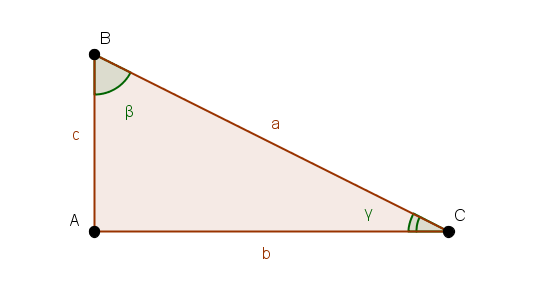

## Project 4: temperature conversion revised

**Skills:**

* docstring
* string definition
* string slicing and indices
* <code>if, elif</code> statement
* logical operator <code>==</code>


**Project**. We want to write a function that is able to perform conversion from Farheneit to Kelvin and viceversa.

In [38]:
def convtemp(temp):       # temp is a string of the form '10K' or '10F'
    '''
    Function to convert from Kelvin to Fahrenheit and viceversa
    INPUT:
        - temperature to be converted in the form of a string 'valueK|F'
    OUTPUT:
        - converted temperature
      '''
    temp_value = float(temp[0:-1])
    # extract the last character of the string
    temp_type = temp[-1]    
    if temp_type == 'K':
        out_temp = 1.8*(temp_value - 273.15)+32
    elif temp_type == 'F':
        out_temp = (temp_value - 32)/1.8+273.15
    return out_temp

In [39]:
help(convtemp)

Help on function convtemp in module __main__:

convtemp(temp)
    Function to convert from Kelvin to Fahrenheit and viceversa
    INPUT:
        - temperature to be converted in the form of a string 'valueK|F'
    OUTPUT:
        - converted temperature



A string is defined using single or double quotes.

In [40]:
tt = convtemp('-40F')

In [41]:
print(tt)

233.14999999999998


**Exercise 4**. Extend the previuos function so that it can handle Kelvin, Fahrenheit and Celsius. You have to add an additional input parameter in order to specify the output format.

## Project 4: computation of the machine epsilon

**Skills:**

* while loop
* logical operator <code>!=</code>

**Project.** Let us compute the machine epsilon `eps` using `while`. Remember that the definition of $\epsilon$ is the smallest number such that $1\neq 1+\epsilon$.

In [42]:
e=1.0
while (1+e!=1):
    e=e/2

print(e)

1.1102230246251565e-16


In [43]:
import numpy as np     # we will see numpy in a following lecture
print(np.finfo(float).eps)

2.220446049250313e-16


## Project 5: conversion of a Roman number to decimal format

**Skills:**

* Dictionaries
* <code>for</code> loop
* <code>range</code> and <code>len</code> function
* <code>-=, +=</code> operators
* <code><</code> logical operator

**Problem.** Write a Python function that converts a Roman number to decimal format.

In [44]:
def Roman2Decimal(Roman):
    symbols = {
    'I': 1,
    'V': 5,
    'X': 10,
    'L': 50,
    'C': 100,
    'D': 500,
    'M': 1000
    }
    Decimal = 0
    for i in range(len(Roman) - 1):
        left = Roman[i]
        right = Roman[i + 1]
        if symbols[left] < symbols[right]:
            Decimal -= symbols[left]
        else:
            Decimal += symbols[left]
    Decimal += symbols[Roman[-1]]
    return Decimal

In [45]:
Roman2Decimal('XCI')

91

**Exercise.** Write a Python function that converts an integer to its binary format.

*Hint:* Consider the following example where we want to convert $13$ to its binary format:

$$
13:2 = 6 \textrm{ with remainder } 1 \\
 6:2 = 3 \textrm{ with remainder } 0 \\
 3:2 = 1 \textrm{ with remainder } 1 \\
 1:2 = 0 \textrm{ with remainder } 1,
$$

now let us take the remainders in reverse order *i.e.* $1101$, this is the binary format of $13$.

The remainder of an integer division is obtained using the operator <code>%</code> and the integer part of the result of a division can be obtained using <code>int</code>. See the following examples:


## Project 7: Fibonacci numbers

**Skills.**

*   recursion
*   <code>range</code> function
* list comprehension
* slicing

**Problem.** The well known Fibonacci sequence is defined by the following recursive relation:

$$
F(0)=0, \\
F(1)=1, \\
F(n)=F(n-1)+F(n-2).
$$

Let us write a function that computes the n*th* term of the sequence using recursion.

In [46]:
25
int(-25)

-25

In [47]:
def recfib(n):
    # add check for input!
    if n <= 1:
        return n
    else:
        return(recfib(n-1) + recfib(n-2))

In [48]:
recfib(5)

5

Let us introduce the function <code>range</code>: this function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number.

The general syntax is <code>range(start, stop, step)</code> where *start* and *step* are optional whereas *stop* is required. Let us consider some examples.

In [49]:
R1 = range(6)
print(R1)

range(0, 6)


In [50]:
print(list(R1))

[0, 1, 2, 3, 4, 5]


In [51]:
R2 = range(10, 20, 2)
print(list(R2))

[10, 12, 14, 16, 18]


In [52]:
R3 = range(20, 10, -1)
print(list(R3))

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11]


Now let us use the *list comprehension* technique to obtain the sequence up to the n*th* term.

*List compehension* in Python is a concise way of creating lists from the ones that already exist.

In [53]:
F=[recfib(n) for n in range(15)]
print(F)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


In [54]:
type(F)

list

Let us see how we can extract elements from the list using the *slicing* technique: in general given a Pytho list $L$ you can use the syntax
<code>L(start:stop:step)</code>, where all parameters are optional.

In [55]:
F[1:4]  # NOTE: the 4th element is not included!

[1, 1, 2]

It is also possible to start from an element until the end of the list

In [56]:
F[5:] # From the 5th element to the end (included)!

[5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

The thid argument in the slicing is the chosen step, if not specified it is assumed to be 1. Otherwise can be set in the following way

In [57]:
F[3:11:3]

[2, 8, 34]

The step can be also negative, meaning that it goes from `start` to `end` with a negative `step`.

In [58]:
F[5:10:-1]

[]

If we want to go backward in a list, the `start` and `end` should be set accordingly

In [59]:
F[10:5:-1]

[55, 34, 21, 13, 8]

By using the default value of `start`, equal to 0, and `end`, equal to the length of the list, we can revert the list by using a negative step.

In [60]:
F[::-1] # NOTE!!!!

[377, 233, 144, 89, 55, 34, 21, 13, 8, 5, 3, 2, 1, 1, 0]

**Exercise.** Write a function for computing the Recaman sequence defined as follows ($n>0$):

$$
R(0)=0,
$$
$$
R(n)=
\begin{cases}
 R(n-1) -n \quad \textrm{ if non negative and not already present,} \\
 R(n-1) +n \quad \textrm{ otherwise.}
\end{cases}
$$

## Project 8: Computation of $\pi$ using Monte Carlo method

**Skills.**

* <code>+=</code> (and similar) operator
* introduction of *Numpy* arrays
* append element to a list and list concatenation
* introduction of *Matplotlib*

**Problem.** Let us pick $N$ random points in a $2D$ plane within a square of side 2 centered in (0,0).

Imagine a circle inscribed into the square; the idea is to use the ratio of number points that lie inside the circle ($N_{\textrm{inside}}$) to the total number of generated points to compute $\pi$. Why does it work ?

The probability that a point falls inside the circle is directly proportional to the area of the circle *i.e.*

$$
\frac{N_{\textrm{inside}}}{N}=\frac{\textrm{Area of the circle}}{\textrm{Area of the square}}.
$$

Moreover we know that area of the square is $4$ while that of circle is $\pi$. The ratio of these two areas is:

$$
\frac{\textrm{Area of the circle}}{\textrm{Area of the square}}=\frac{\pi}{4},
$$

we can compute $\pi$ as

$$
\pi= 4\frac{N_{\textrm{inside}}}{N}.
$$

In [61]:
import math as mt
import random

def compute_pi_mc(N):
    circle_points, square_points = [0]*2

    for i in range(N):
        # Generate a random point
        rand_x = random.uniform(-1, 1)
        rand_y = random.uniform(-1, 1)

        # Compute the distance of the point from the origin
        dist = mt.sqrt(rand_x**2 + rand_y**2)

        # Check if the point lies inside the circle
        circle_points += 1 if dist <= 1 else 0
        square_points += 1

    # Estimate the value of pi
    return 4.0 * circle_points / square_points

In [62]:
N = 10000
compute_pi_mc(N)

3.1388

Let us now try to visualize the procedure. In order to obatin this result we modify the function so that the output is given by:


*   the estimated value of $\pi$;
*   the $x$ and $y$ coordinates of the points inside the circle;
*   the $x$ and $y$ coordinates of the points outside the circle;
*   the vector containing all the iterates of the estimated value of $\pi$.

We introduce also **Numpy** which is the module of Python that provides the implementation of *arrays*. Most of the functions present in the module `math` are also in `numpy`, for this if the latter is used it is possible to avoid the import of `math`.


In [1]:
import numpy as np

def compute_pi_mc_g(N):

    circle_points, square_points = 0, 0
    x_in, y_in, x_out, y_out = [np.empty(0)]*4
    vec_pi_est = np.empty(N)

    for i in np.arange(N):
        # Generate a random point
        rand_x = np.random.uniform(-1, 1)
        rand_y = np.random.uniform(-1, 1)

        # Compute the distance of the point from the origin
        dist = np.linalg.norm([rand_x, rand_y])

        # Check if the point lies inside the circle
        if dist <= 1:
            circle_points += 1
            x_in = np.append(x_in, rand_x)
            y_in = np.append(y_in, rand_y)
        else:
            x_out = np.append(x_out, rand_x)
            y_out = np.append(y_out, rand_y)
            
        square_points += 1
        # Estimate the value of pi
        pi_est = 4.0 * circle_points / square_points
        vec_pi_est[i] = pi_est

    return pi_est, x_in, y_in, x_out, y_out, vec_pi_est

In [2]:
N = 1000
pi_est, x_in, y_in, x_out, y_out, vec_pi_est = compute_pi_mc_g(N)
print(pi_est)

3.108


Now we have to plot the obtained data. The module of Python for plotting is **Matplotlib**.

In [65]:
g = np.linspace(0, 10, 20)
type(g)
np.cos(g)

array([ 1.        ,  0.8646637 ,  0.49528663, -0.00815095, -0.5093823 ,
       -0.87273782, -0.99986712, -0.8563598 , -0.48105935,  0.02445069,
        0.52334259,  0.88058   ,  0.99946853,  0.84782832,  0.46670422,
       -0.04074393, -0.53716381, -0.88818817, -0.99880433, -0.83907153])

In [66]:
l = [1,2,3,4,5]
type(l)

list

In [67]:
la = np.array([[1,2],[3,4]])
la

array([[1, 2],
       [3, 4]])

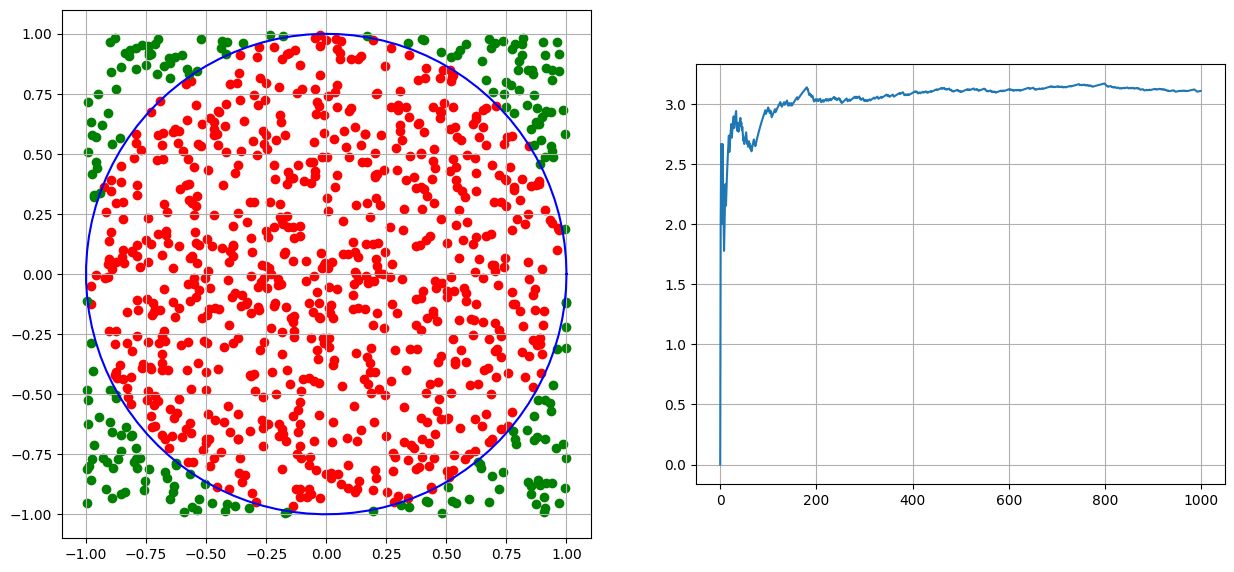

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]
fig, (ax1, ax2) = plt.subplots(1, 2)

# Draw a unit circle centered at the origin
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
xs = np.cos(angles)
ys = np.sin(angles)
ax1.set_aspect( 1 )
ax1.plot(xs, ys, color = 'blue')

# Draw the points
ax1.scatter(x_in, y_in, color='r')
ax1.scatter(x_out, y_out, color='g')
ax1.grid()

ax2.grid()
ax2.plot(vec_pi_est)
ax2.set_aspect(250)
